<a href="https://colab.research.google.com/github/kristopherpaul/ML_InductionAssignment_IITGN/blob/main/3_Mathematics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3 Mathematics**

**Gaussian Process**\
Consider a function $F : \mathcal{X} \rightarrow \mathbb{R}$ evaluated at a set of inputs, $X = \{x_{n} \, \epsilon \, \mathcal{X}\}_{n=1}^{N}$. Let $F_{X} = [F(x_{1}),...,F(x_{N})]$ be the set of unknown function values for these inputs. if $F_{X}$ is jointly gaussian for any set of $N \geq 1$ points, then we call $F : \mathcal{X} \rightarrow \mathbb{R}$ a Gaussian process.\
This process is defined by its mean function $m(x) \, \epsilon \, \mathbb{R}$ and covariance function $\mathcal{K}(x,x') \geq 0$ which is any Mercer kernel.

**What is a Mercer kernel?**\
Given a set of $N$ datapoints, let us define the Gram matrix as the following $N × N$ similarity matrix:\
\begin{gather}
K =
\begin{pmatrix}
\mathcal{K}(x_{1},x_{1}) & \cdots & \mathcal{K}(x_{1},x_{N})\\
& \vdots & \\
\mathcal{K}(x_{N},x_{1}) & \cdots & \mathcal{K}(x_{N},x_{N})
\end{pmatrix}
\end{gather}
We say that $\mathcal{K}$ is a Mercer kernel if the Gram matrix is positive semi-definite for any set of distinct inputs $\{x_{i}\}_{i=1}^{N}$.

**Why is $\mathcal{K}(x,x') \geq 0$ a necessary condition?**\
The covariance matrix is defined as $C = E[X-\mu][X-\mu]^{T}$. Let $v \, \epsilon \, \mathbb{R}^{N}$ be an arbitrary vector, then
\begin{equation}
\begin{split}
v^{T}Cv & = E[v^{T}(X-\mu)][(X-\mu)^{T}v] \\
 & = E[(X-\mu)^{T}v]^{T}[(X-\mu)^{T}v] \\
 & = E[(X-\mu)^{T}v]^{2} \geq 0
\end{split}
\end{equation}
Therefore, the covariance matrix $C$ is positive semi-definite. Since $K$ is a covariance function, it also has to be positive semi-definite implying that $\mathcal{K}(x,x') \geq 0$.

**Squared exponential (RBF) kernel**\
It is defined as $\mathcal{K}(x,x')=exp\left(-\frac{\left \| x-x' \right \|^{2}}{2l^{2}}\right)$. Here $l$ is the length scale parameter of the kernel, i.e, the distance over which differences start to matter. This is a positive semi-definite kernel function and it is the kernel which is going to be used for this task.

**Important Results from Probability theory**

- Multivariate Joint Gaussian Distribution

$$
P_{X, Y} = \left(
    \begin{bmatrix}
    \mu_X \\
    \mu_Y \\
    \end{bmatrix},
    \begin{bmatrix}
    \Sigma_{XX} &\Sigma_{XY} \\
    \Sigma_{YX} &\Sigma_{YY} \\
    \end{bmatrix}
    \right)
$$

- Marginalization

$$
X \sim \mathcal{N}(\mu_X, \Sigma_{XX})
$$

$$
Y \sim \mathcal{N}(\mu_Y, \Sigma_{YY})
$$

$$
p_X(x) = \int_y{p_{X, Y}(x, y) dy} = \int_y{p_{X|Y}(x|y)p_Y(y)dy}
$$

- Conditioning

$$
X|Y \sim \mathcal{N}\left(\mu_X + \Sigma_{XY}\Sigma^{-1}_{YY}(Y - \mu_Y), \space\space \Sigma_{XX} - \Sigma_{XY} \Sigma_{YY}^{-1}\Sigma_{YX}\right) \\
$$
$$
Y|X \sim \mathcal{N}\left(\mu_Y + \Sigma_{YX}\Sigma_{XX}^{-1}(X - \mu_X), \space\space \Sigma_{YY} - \Sigma_{YX} \Sigma_{XX}^{-1}\Sigma_{XY}\right)
$$

**Gaussian Process Regression**

By definition of the GP, the joint distribution $P(F, f | X, X')$ has the form

$$
    \begin{bmatrix}
    F \\
    f \\
    \end{bmatrix} \sim \mathcal{N}\left(
        \begin{bmatrix}
        0 \\
        0
        \end{bmatrix},
        \begin{bmatrix}
        \Sigma_{X, X} &\Sigma_{X, X'} \\
        \Sigma_{X', X} &\Sigma_{X', X'}
        \end{bmatrix}
    \right)
$$

Using the rules for conditioning Gaussians mentioned above, we get

$$
P(f | F) = \mathcal{N}(\mu', \Sigma')
$$

where,

$$
\mu' = \Sigma_{X', X} \Sigma_{X, X}^{-1}F \\
\Sigma' = \Sigma_{X', X'} - \Sigma_{X', X} \Sigma_{X, X}^{-1} \Sigma_{X, X'}
$$

**Cholesky Decomposition**

The cholesky decomposition decomposes a positive (semi)definite matrix into a lower triangular matrix, $L$, with real and non-zero diagonal entries and $L^T$, the transpose of $L$.

$$
A = LL^T
$$

**Importance of cholesky decomposition**

*Efficient Computation*, Cholesky decomposition allows for efficient and numerically stable computation of inversion and manipulation of covariance matrices, which otherwise can be quite computationally demanding, especially for large datasets.

**How to find the inverse of a matrix via cholesky decomposition**

$$
A = LL^{T} \\
A^{-1} = (LL^{T})^{-1} = L^{-T}L^{-1}
$$

The above expression is much computationally efficient to compute than a direct inverse.

**Extrapolation on new data**

In the context of GPR, "extrapolation" refers to making predictions for inputs that are outisde the range of training data. The quality of extrapolation can be assessed by evaluating how well the surrogate function captures the underlying trends and patterns of the true function beyond the observed data points.

The kernel function in GP model can have parameters that need to be optimized. The optimization of kernel parameters is an important step in GPR to improve the model's fit to the data.

To optimize the parameters of the kernel function, Maximum Likelihood Estimation (MLE) or maximum a posteriori (MAP) estimation. The goal is to find the values of the kernel parameters that maximize the likelihood or posterior probability of the observed data.

GPR differs from regular neural networks in terms of optimization. Neural networks typically involve an optimization step where model parameters are iteratively updated to minimize a defined loss function. This optimization process often employs gradient-based methods, such as backpropogation and stochastic gradient descent, to find the optimal parameters that minimize the prediction error on the training data.

However, GPR does not involve such kind of parameter optimization, where it only employs bayesian based approaches like MLE and MAP as mentioned above to optimize for the parameters such as length scale and variance of the kernel (RBF).

**Extension to classification**

Gaussian Process regression can be extended to perform classification by using appropriate likelihood functions. The standard Gaussian Process framework assumes a Gaussian likelihood for regression tasks. To perform classification, a different likelihood function, such as the probit or logistic likelihood, can be used. The choice of the likelihood function would depend on the specific classification problem and the desired behavior of the surrogate function. By adjusting the likelihood function and the associated inference methods, Gaussian Process can be adapted for classification tasks.






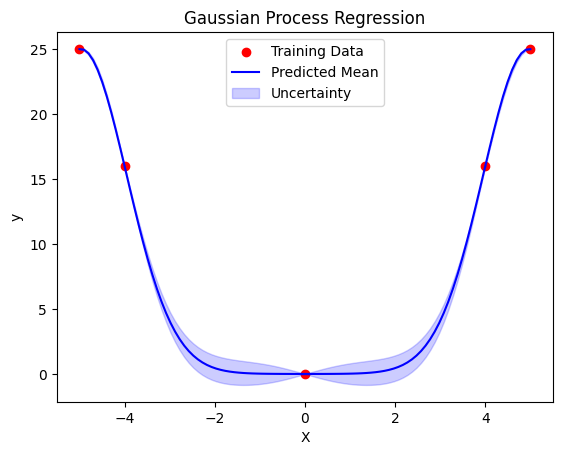

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class GaussianProcessRegressor:
    def __init__(self, kernel):
        self.kernel = kernel
        self.X = None
        self.y = None
        self.K = None
        self.K_inv = None

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.K = self.kernel(X, X)
        self.K_inv = np.linalg.inv(self.K)

    def predict(self, X_pred):
        K_s = self.kernel(self.X, X_pred)
        K_ss = self.kernel(X_pred, X_pred)
        K_sT_K_inv = np.dot(K_s.T, self.K_inv)
        mu = np.dot(K_sT_K_inv, self.y)
        cov = K_ss - np.dot(K_sT_K_inv, K_s)
        return mu, cov

def rbf_kernel(X1, X2, length_scale=1.0, variance=1.0):
    sq_dist = np.sum(X1 ** 2, 1).reshape(-1, 1) + np.sum(X2 ** 2, 1) - 2 * np.dot(X1, X2.T)
    return variance * np.exp(-0.5 / length_scale**2 * sq_dist)

X_train = np.array([[-5], [-4], [0], [4], [5]])
y_train = np.power(X_train,2)

X_test = np.linspace(-5, 5, 100).reshape(-1, 1)

kernel = lambda x1, x2: rbf_kernel(x1, x2, length_scale=1.0, variance=1.0)
gp = GaussianProcessRegressor(kernel)

gp.fit(X_train, y_train)

y_pred_mean, y_pred_cov = gp.predict(X_test)

plt.figure()
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.plot(X_test, y_pred_mean, color='blue', label='Predicted Mean')
plt.fill_between(X_test.flatten(), y_pred_mean.flatten() - np.sqrt(np.diag(y_pred_cov)), y_pred_mean.flatten() + np.sqrt(np.diag(y_pred_cov)), alpha=0.2, color='blue', label='Uncertainty')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()